Assignment 6 and 7: PCA and Clustering Analysis

# Table of Contents

# Assignment Questions



# Library Imports

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For PCA and clustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load In Data

In [2]:
# Load the data
file_path = "C:/Users/johne/Downloads/Electronic_sales_Sep2023-Sep2024.csv"

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Basic Data Exploration

In [3]:
# Explore the data
# Display the first few rows
print("First few rows of the data:")
display(df.head())

# Check data types
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First few rows of the data:


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56



Data types:
Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

Summary statistics:


,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000



Missing values in each column:
Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64


# Visualizing Data

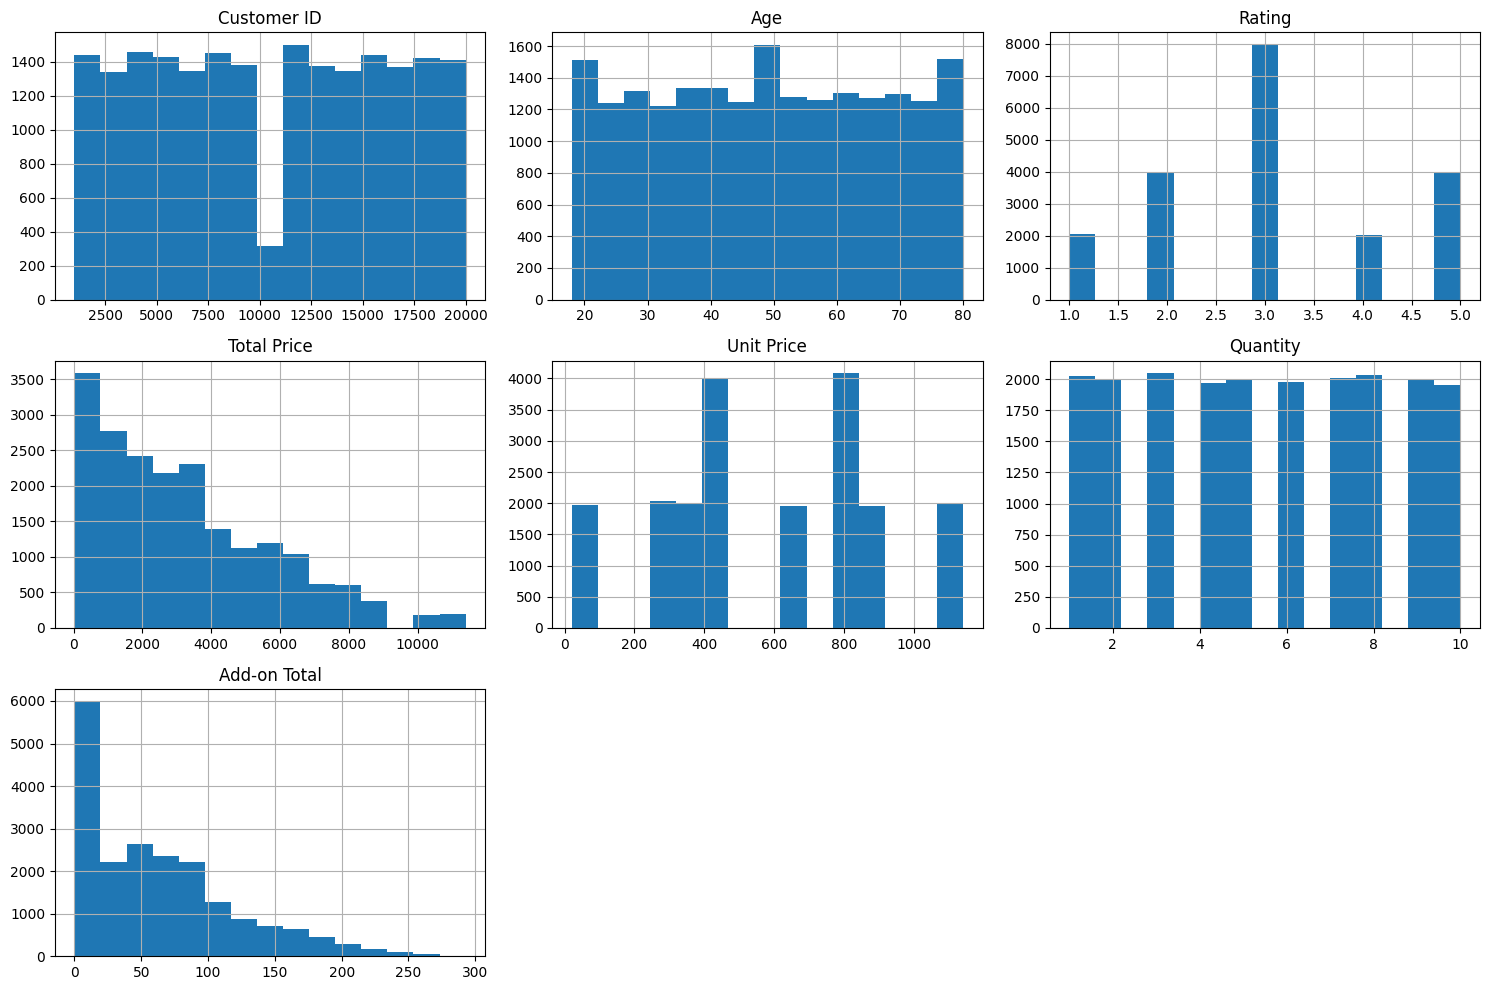

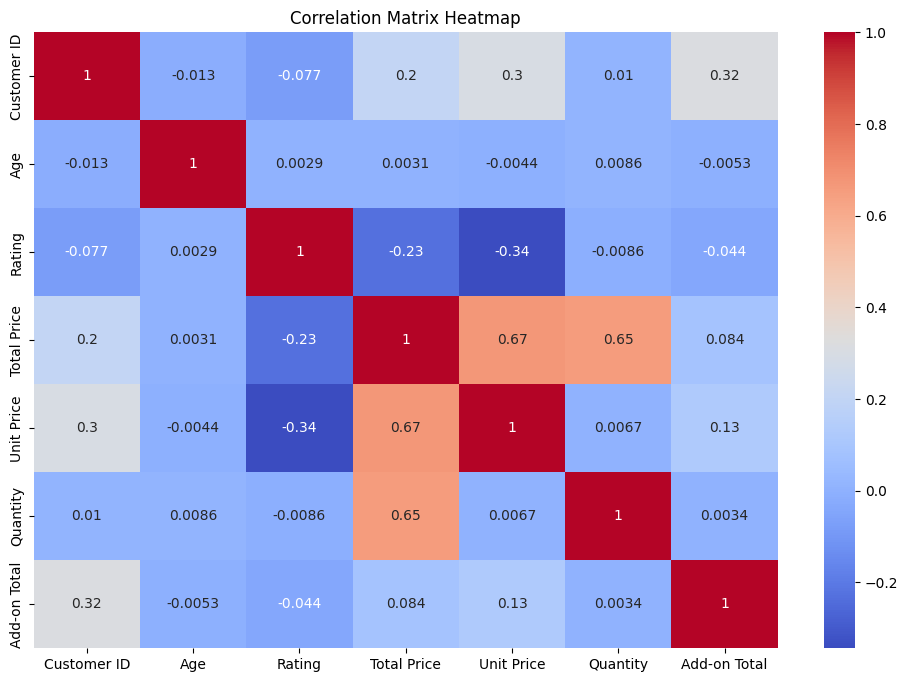

In [4]:
# Data visualization
# Histograms of numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pre-processing Data

In [5]:
# Standardize the numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

# Perform PCA 

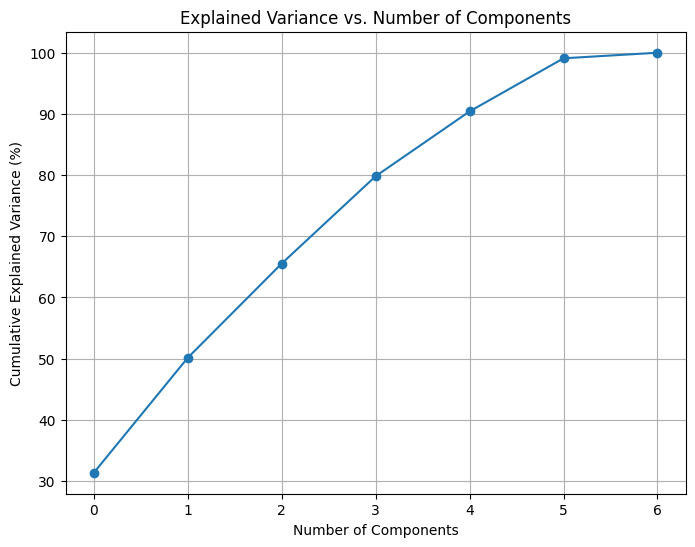

In [6]:
# Fit PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance)*100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## Perform PCA with Components

In [14]:
# Decide on the number of components (e.g., 2 components explain sufficient variance)
n_components = 5

# Perform PCA with selected number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])


# Cluster Analysis

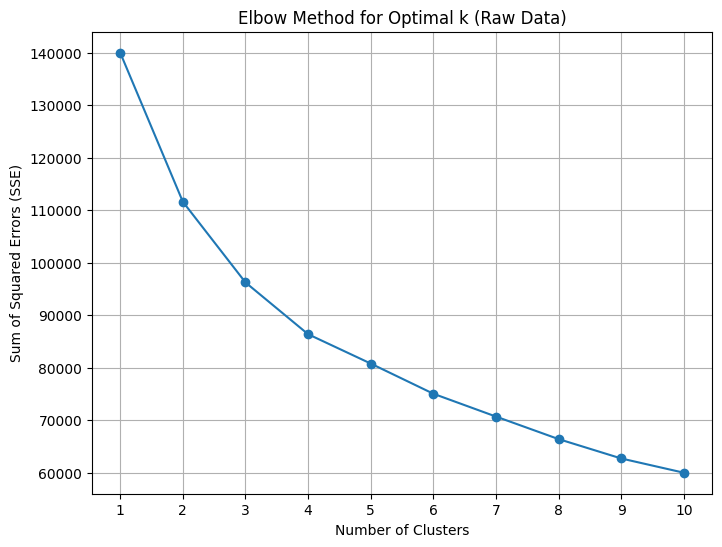

In [15]:
# Determine optimal number of clusters using Elbow method
sse = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE vs. number of clusters
plt.figure(figsize=(8,6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k (Raw Data)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Optimal K and KMeans Clustering 

In [16]:
# From the plot, choose optimal k (e.g., k=3)
k_optimal = 3

# KMeans clustering on raw data
kmeans_raw = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster_Raw'] = kmeans_raw.fit_predict(df_scaled)

# Clustering on PCA Data

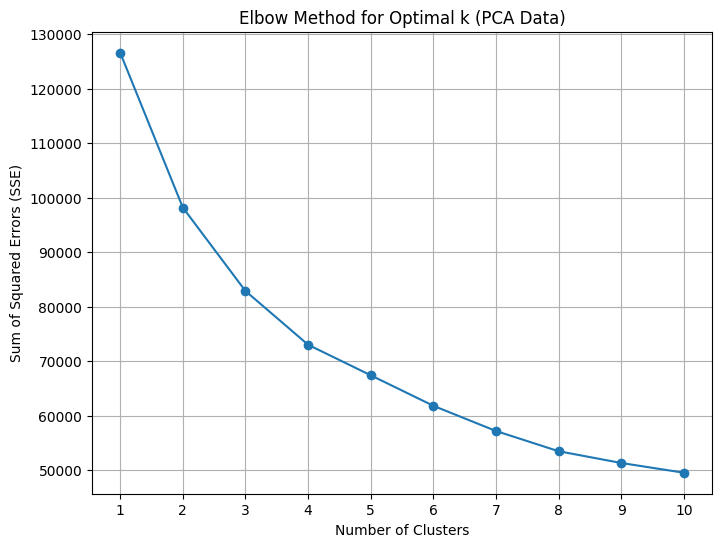

In [17]:
# Determine optimal number of clusters using Elbow method
sse_pca = []
for k in k_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(principal_df)
    sse_pca.append(kmeans_pca.inertia_)

# Plot SSE vs. number of clusters
plt.figure(figsize=(8,6))
plt.plot(k_range, sse_pca, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Again, choose k=3
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42)
principal_df['Cluster_PCA'] = kmeans_pca.fit_predict(principal_df)

# Visualizing Clusters

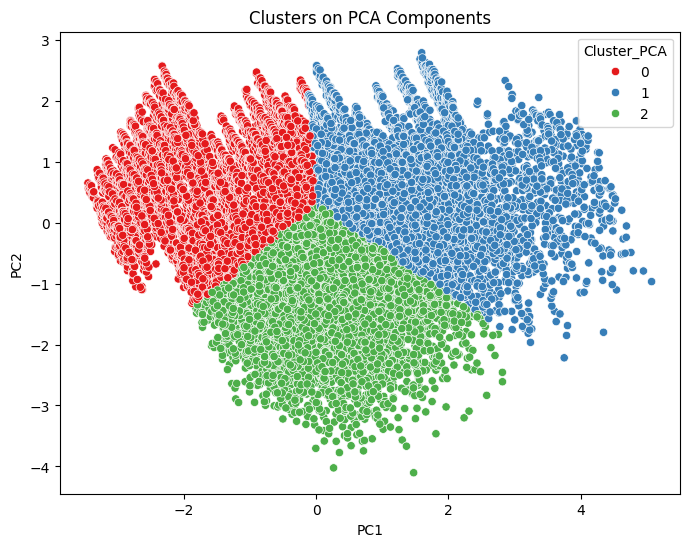

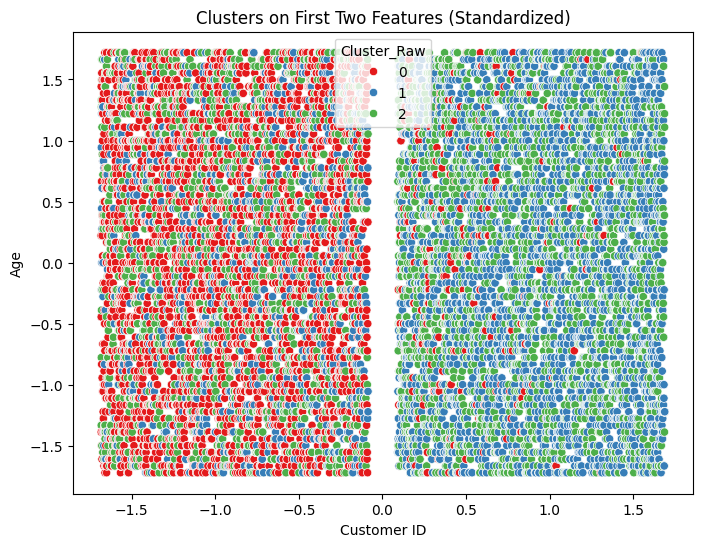

In [11]:
# Visualize clusters on PCA data
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_PCA', data=principal_df, palette='Set1')
plt.title('Clusters on PCA Components')
plt.show()

# Visualize clusters on raw data
# Since the data is high-dimensional, we'll use the first two standardized features
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], hue=df['Cluster_Raw'], palette='Set1')
plt.title('Clusters on First Two Features (Standardized)')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.show()

In [12]:
# Compare clustering results
# Merge cluster labels
df_clusters = df[['Cluster_Raw']].join(principal_df[['Cluster_PCA']])

# Crosstab of clusters
cluster_comparison = pd.crosstab(df_clusters['Cluster_Raw'], df_clusters['Cluster_PCA'])
print("\nCrosstab of clusters from raw data and PCA data:")
print(cluster_comparison)


Crosstab of clusters from raw data and PCA data:
Cluster_PCA     0     1     2
Cluster_Raw                  
0            5775    21    29
1             980   148  6160
2              29  6425   433
